In [33]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [34]:
#Read the excel data file

df=pd.read_excel("FinalData.xlsx")

In [35]:
#To view top 5 rows

df.head()

,content,Intent,Type of Query,Category
0,In this video as Sudhansu sir explains that we...,activation_function,Technical Query,DL
1,I have some doubts regarding Activation functi...,activation_function,Technical Query,DL
2,Suppose i am using any activation function and...,activation_function,Technical Query,DL
3,I know in case vanishing gradient weight of in...,activation_function,Technical Query,DL
4,I am a student of DLCVNLP 25th batch and have ...,activation_function,Technical Query,DL


## Text Preprocessing & EDA

In [36]:
#To Check any null values

df.isnull().sum()

content          0
Intent           0
Type of Query    0
Category         0
dtype: int64

In [37]:
#This function cleans the text. removes junk values as mentioned in the function.

def clean_text(content):
    content = content.str.replace("(<br/>)", "")
    content = content.str.replace('(<a).*(>).*(</a>)', '')
    content = content.str.replace('(&amp;)', '')
    content = content.str.replace('(&gt)', '')
    content = content.str.replace('(&lt)', '')
    content = content.str.replace('(\xa0)', ' ')
    content = content.str.replace('(&quot;)', '')
    content = content.str.replace('(&apos;)', '')   
    
    return content

df['content'] = clean_text(df['content'])

In [38]:
#Create a new column "content_len" which gives length of query string
df['content_len'] = df['content'].astype(str).apply(len)

#Create a new column "word_count" which gives count of each word in the given query string
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

In [40]:
#Converts given string into lowercase

df["content"]=df['content'].str.lower()

In [41]:
df.head()

,content,Intent,Type of Query,Category,content_len,word_count
0,in this video as sudhansu sir explains that we...,activation_function,Technical Query,DL,353,60
1,i have some doubts regarding activation functi...,activation_function,Technical Query,DL,73,12
2,suppose i am using any activation function and...,activation_function,Technical Query,DL,181,32
3,i know in case vanishing gradient weight of in...,activation_function,Technical Query,DL,453,79
4,i am a student of dlcvnlp 25th batch and have ...,activation_function,Technical Query,DL,211,39


## Count of "Type of Query" asked by Students

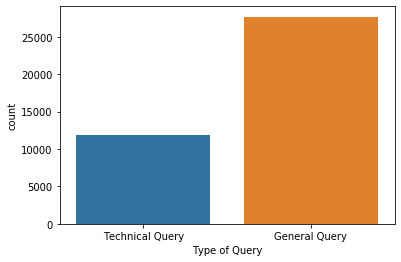

In [42]:
#Here,sns.countplot gives count of a particular Type of query.

sns.countplot(data=df,x='Type of Query')
plt.show()

## Count of "Category" to which query belongs

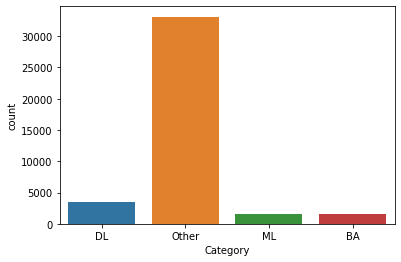

In [43]:
#Gives count of each values in category column

sns.countplot(data=df,x='Category')
plt.show()

In [44]:
#Gives unique intents present in "Intent" column

df.Intent.unique()  

array(['activation_function', 'anaconda_installation',
       'anaconda_navigator', 'anaconda_prompt', 'anaconda_query',
       'assignment_data_visulization', 'assignment_evaluation',
       'assignment_exception_handling', 'assignment_KNN',
       'assignment_LinearRegression', 'assignment_link',
       'assignment_matplotlib', 'assignment_numpy', 'assignment_pandas',
       'assignment_powerbi', 'assignment_python', 'assignment_query',
       'assignment_stats', 'assignment_submission',
       'aws_deployment_error', 'aws_lex_account_query',
       'azure_luis_deployment', 'batch_changed', 'batch_details',
       'Bert_query', 'blog', 'books_availablity_dashboard', 'bot_timing',
       'canvas_details_edit', 'canvas_link', 'career_transition',
       'career_guidence', 'certificates_enquery', 'chatbot_issue',
       'class_details', 'class_link', 'class_query', 'cmd',
       'cnn_question', 'cnn_query', 'colab_help', 'community_class',
       'community_class_certificates', 'communi

In [45]:
#total count of uniques intents

df['Intent'].nunique() #There are 177 uniques intents

177

In [46]:
#To describe column

df.describe()

,content_len,word_count
count,39562.000000,39562.000000
mean,71.472170,12.160255
std,125.344119,15.285140
min,0.000000,0.000000
25%,26.000000,5.000000
50%,46.000000,8.000000
75%,81.000000,15.000000
max,7645.000000,629.000000


## TOP 20 Intents count 

In [47]:
#To check top 20 intents based on counts

df['Intent'].value_counts().nlargest(20)

welcome_reply              3192
internship_query           2952
batch_details              2441
user_email                 2165
assignment_query           1259
course_details             1133
yes_reply                  1131
Greetings                  1097
thanks_reply                867
community_class             844
assignment_submission       725
Dashboard_access            724
class_link                  684
tensorflow_installation     622
user_name                   617
jupyter_notebook            585
NewBatch_details            533
pandas_general_query        518
user_number                 513
deployment                  441
Name: Intent, dtype: int64

Stopwords Removal

In [48]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","not","able","sir","want","to","using","will","am","to","the","be","need"]

In [49]:
#To remove stopwords from content column

df['Content_wo_stopwords'] =df['content'].apply(lambda x: ' '.join([i for i in str(x).split() if i not in stopwords]))

In [50]:
df.head()

,content,Intent,Type of Query,Category,content_len,word_count,Content_wo_stopwords
0,in this video as sudhansu sir explains that we...,activation_function,Technical Query,DL,353,60,video sudhansu explains softmax function class...
1,i have some doubts regarding activation functi...,activation_function,Technical Query,DL,73,12,"doubts regarding activation function, please h..."
2,suppose i am using any activation function and...,activation_function,Technical Query,DL,181,32,suppose activation function accuracy model goo...
3,i know in case vanishing gradient weight of in...,activation_function,Technical Query,DL,453,79,know case vanishing gradient weight inner laye...
4,i am a student of dlcvnlp 25th batch and have ...,activation_function,Technical Query,DL,211,39,student dlcvnlp 25th batch question related co...


## Word Cloud for Type of Query and Category

Technical Query


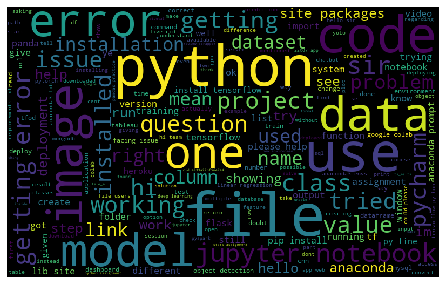

General Query


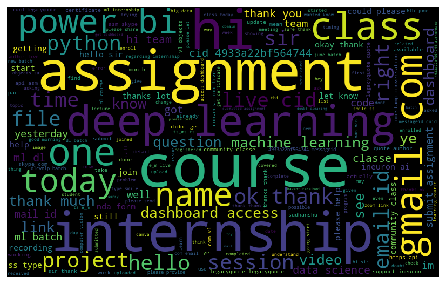

DL


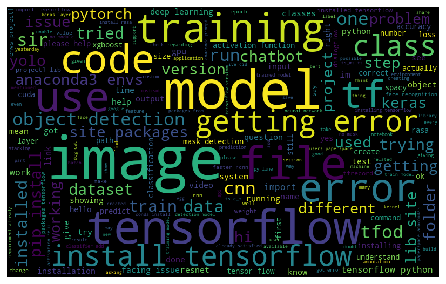

Other


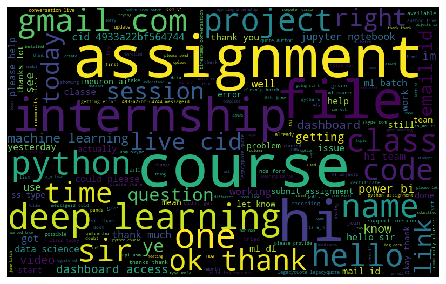

ML


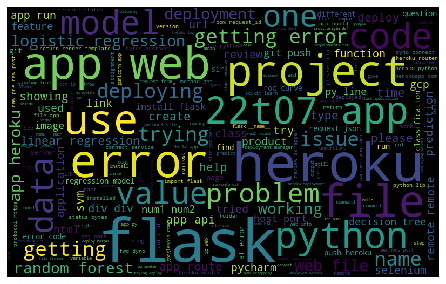

BA


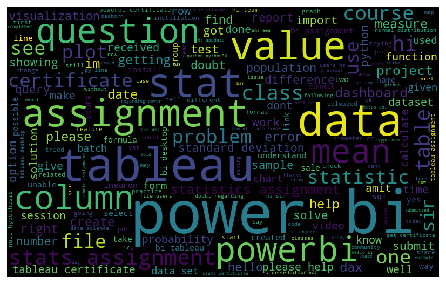

In [51]:
#This code takes each feature from given list of features and generates wordcloud.

features=['Type of Query','Category']
for feature in features:
    for i in df[feature].unique():
        print(i)
        all_words = ' '.join([text for text in df.loc[df[feature].str.contains(i),'Content_wo_stopwords']])
        wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

        plt.figure(figsize=(6, 6),facecolor = None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad = 0)
        plt.show()

# Insights:


    1. As observed from charts, General query are most asked quries than technical queries.
    2. Category wise, Other category type quries are asked more. Other categories include queries which are common between 
       DL,ML,BA.
    3. There are 177 unique intents.
    4. Average length of the queries is 71.47
    5. Average woed count of the queries is 12.16
    6. Welcome_reply intent has maximum queries.
    7. Please observe word cloud to check repeated words in each category.